# <center><font color='blue'>**Credit application Analysis**</font></center>

<img src="https://cdn.corporatefinanceinstitute.com/assets/credit-analysis-basics.jpeg" alt="Alternative text" />

#### Problem statment:
To identify the characteristics of the loan applicants and anylsis of the criteria for loan approval


#### Info about the dataset: 
This dataset contains information on the loan applications with status details of the approval status (NAME_CONTRACT_TYPE) i.e Approved, Cancelled, Refused or Unused offer.

###  Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the CSV file and loading to dataframe object

In [2]:
credit_data = pd.read_csv('credit_details.csv')

### Checking the first ten rows to understand about the dataset

In [3]:
credit_data.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,...,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


### Finding the number of row, cols and elements using the shape and size methods

In [4]:
print(f"\n Number of rows: {credit_data.shape[0]}\n Number of columns: {credit_data.shape[1]} \n Number of elements: {credit_data.size}")


 Number of rows: 1670214
 Number of columns: 37 
 Number of elements: 61797918


### Finding about the column type of all the columns in the dataset

In [5]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Data Cleaning

### Analysing and handling the values in the categorical coloumns

In [6]:
credit_data['CHANNEL_TYPE'].value_counts()

Credit and cash offices       719968
Country-wide                  494690
Stone                         212083
Regional / Local              108528
Contact center                 71297
AP+ (Cash loan)                57046
Channel of corporate sales      6150
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

In [7]:
# In the data definition of this dataset there is no explanation given for the AP+ (Cash loan) value so we are removing 
# the rows which are having this value
credit_data.drop(credit_data[credit_data['CHANNEL_TYPE']=='AP+ (Cash loan)'].index, inplace=True)

### Checking the null values

In [8]:
credit_data.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     367010
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                838864
AMT_GOODS_PRICE                 375959
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               838864
RATE_INTEREST_PRIMARY          1607217
RATE_INTEREST_PRIVILEGED       1607217
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 794299
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

As the number of rows in the data is it is tough to analse based on the null value count. So we are going for 
the percentage value

In [9]:
round(((credit_data.isnull().sum() / len(credit_data))*100),1)

SK_ID_PREV                      0.0
SK_ID_CURR                      0.0
NAME_CONTRACT_TYPE              0.0
AMT_ANNUITY                    22.8
AMT_APPLICATION                 0.0
AMT_CREDIT                      0.0
AMT_DOWN_PAYMENT               52.0
AMT_GOODS_PRICE                23.3
WEEKDAY_APPR_PROCESS_START      0.0
HOUR_APPR_PROCESS_START         0.0
FLAG_LAST_APPL_PER_CONTRACT     0.0
NFLAG_LAST_APPL_IN_DAY          0.0
RATE_DOWN_PAYMENT              52.0
RATE_INTEREST_PRIMARY          99.6
RATE_INTEREST_PRIVILEGED       99.6
NAME_CASH_LOAN_PURPOSE          0.0
NAME_CONTRACT_STATUS            0.0
DAYS_DECISION                   0.0
NAME_PAYMENT_TYPE               0.0
CODE_REJECT_REASON              0.0
NAME_TYPE_SUITE                49.2
NAME_CLIENT_TYPE                0.0
NAME_GOODS_CATEGORY             0.0
NAME_PORTFOLIO                  0.0
NAME_PRODUCT_TYPE               0.0
CHANNEL_TYPE                    0.0
SELLERPLACE_AREA                0.0
NAME_SELLER_INDUSTRY        

### Finding the number of unique values exits in the cols

In [10]:
credit_data.nunique()

SK_ID_PREV                     1613168
SK_ID_CURR                      337267
NAME_CONTRACT_TYPE                   4
AMT_ANNUITY                     356624
AMT_APPLICATION                  93825
AMT_CREDIT                       86543
AMT_DOWN_PAYMENT                 29278
AMT_GOODS_PRICE                  93825
WEEKDAY_APPR_PROCESS_START           7
HOUR_APPR_PROCESS_START             24
FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
RATE_DOWN_PAYMENT               207033
RATE_INTEREST_PRIMARY              148
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              25
NAME_CONTRACT_STATUS                 4
DAYS_DECISION                     2922
NAME_PAYMENT_TYPE                    4
CODE_REJECT_REASON                   9
NAME_TYPE_SUITE                      7
NAME_CLIENT_TYPE                     4
NAME_GOODS_CATEGORY                 28
NAME_PORTFOLIO                       5
NAME_PRODUCT_TYPE                    3
CHANNEL_TYPE             

 Based on unique value analysis, we decided to remove the following coloumns
 
 SK_ID_CURR - ID doesn't represent any uniqueness
 

 By industry practice, the columns are removed when are we having more than 75% null values
 
 RATE_INTEREST_PRIMARY & RATE_INTEREST_PRIVILEGED - Both columns contains 99.6% null values 
 
 Ref: https://medium.com/analytics-vidhya/how-to-handle-missing-values-cbd03fb79ef8

In [11]:
credit_data.drop(columns =['SK_ID_CURR','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'], inplace=True, axis=1)

For other null value handling we have written a code snippet which fill the values based on the column type
1. float and int type columns  with the null values in the row will be replaced with the mean
2. object columns with the null values in the row will be replaced with the mode
3. XNA is used as proxy for None is some categorical coloumns to handle theat we have used the where method to find and replace it with the mode value 

In [12]:
for col in credit_data.columns:
    if credit_data[col].isnull().sum():
        if credit_data[col].dtype in ['float64','int64']:
            credit_data[col].fillna(value=credit_data[col].median(), inplace=True)
        elif credit_data[col].dtype == 'object':
            credit_data[col].fillna(value=credit_data[col].mode(), inplace=True)
    if credit_data[col].dtype == 'object':
        if credit_data[col].value_counts().index[0] == 'XNA':           #If XNA is mode for the col we will select the second most appearing value
            mode_value = credit_data[col].value_counts().index[1]
        else:
            mode_value = credit_data[col].mode()
        credit_data[col] = np.where(credit_data[col] == "XNA", mode_value, credit_data[col])

### Check for duplicate rows in the dataset

In [13]:
credit_data.duplicated().sum()
#There is no duplicated rows in the dataset

0

## Exploratory Data Analysis

In [14]:
credit_data.describe().apply(lambda s: s.apply('{0:.2f}'.format))
#The count, Mean, Standard Deviation, Minimum, Quartiles and Max values for the int and float data types are displayed below

,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1613168.00,1613168.00,1613168.00,1613168.00,1613168.00,1613168.00,1613168.00,1613168.00,1613168.00,1613168.00,1613168.00,1613168.00,1613168.00,1613168.00,1613168.00,1613168.00,1613168.00,1613168.00
mean,1922964.17,14751.19,171433.85,191123.35,4069.07,196624.50,12.51,1.00,0.07,-892.14,323.90,15.00,352116.85,7624.78,19053.22,44346.22,47610.79,0.20
std,532617.66,13102.69,289521.54,314919.09,14713.63,278007.95,3.34,0.05,0.08,788.02,7252.08,12.69,68089.45,55569.80,82411.84,120368.45,123970.29,0.40
min,1000001.00,0.00,0.00,0.00,-0.90,0.00,0.00,0.00,-0.00,-2922.00,-1.00,0.00,-2922.00,-2892.00,-2801.00,-2889.00,-2874.00,0.00
25%,1461610.75,7476.44,17955.00,23143.50,1642.50,66321.00,10.00,1.00,0.05,-1341.00,-1.00,10.00,365243.00,-1049.00,-619.00,-766.00,-724.00,0.00
50%,1922938.50,11154.78,68616.00,76936.50,1642.50,107995.50,12.00,1.00,0.05,-587.00,0.00,12.00,365243.00,-848.00,-384.00,-558.00,-519.00,0.00
75%,2384145.25,16494.75,180000.00,202500.00,1642.50,180000.00,15.00,1.00,0.05,-280.00,90.00,14.00,365243.00,-691.00,-203.00,-383.00,-346.00,0.00
max,2845382.00,418058.15,6905160.00,6905160.00,3060045.00,6905160.00,23.00,1.00,1.00,-1.00,4000000.00,84.00,365243.00,365243.00,365243.00,365243.00,365243.00,1.00


#### Checking the records which are having the top 10 largest annuity amount

In [15]:
credit_data.nlargest(10,'AMT_ANNUITY')

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
516560,2501351,Cash loans,418058.145,2250000.0,2369070.0,1642.5,2250000.0,FRIDAY,11,Y,...,Consumer electronics,6.0,low_action,Cash Street: low,365243.0,-848.0,-384.0,-558.0,-519.0,0.0
911948,1225459,Cash loans,418058.145,2250000.0,2369070.0,1642.5,2250000.0,MONDAY,10,Y,...,Consumer electronics,6.0,low_action,Cash Street: low,365243.0,-848.0,-384.0,-558.0,-519.0,0.0
79406,1065968,Cash loans,417927.645,2250000.0,2369070.0,1642.5,2250000.0,WEDNESDAY,15,Y,...,Consumer electronics,6.0,low_action,Cash Street: low,365243.0,-848.0,-384.0,-558.0,-519.0,0.0
557857,1314599,Cash loans,417927.645,2250000.0,2369070.0,1642.5,2250000.0,TUESDAY,18,Y,...,Consumer electronics,6.0,low_action,Cash Street: low,365243.0,-848.0,-384.0,-558.0,-519.0,0.0
1041292,1439030,Consumer loans,393868.665,3066853.5,2176551.0,920056.5,3066853.5,SUNDAY,18,Y,...,Furniture,6.0,low_normal,POS industry with interest,365243.0,-397.0,-247.0,-247.0,-239.0,0.0
812131,1708234,Consumer loans,357733.260,2205243.0,2012224.5,220527.0,2205243.0,FRIDAY,13,Y,...,Furniture,6.0,low_normal,POS industry with interest,365243.0,-848.0,-384.0,-558.0,-519.0,0.0
1667858,1680534,Cash loans,309942.000,900000.0,900000.0,1642.5,900000.0,FRIDAY,16,Y,...,Consumer electronics,3.0,low_action,Cash Street: low,365243.0,-848.0,-384.0,-558.0,-519.0,0.0
1079855,1845093,Consumer loans,300425.445,1427553.0,1142041.5,285511.5,1427553.0,FRIDAY,15,Y,...,Construction,4.0,low_normal,POS industry with interest,365243.0,-99.0,-9.0,-9.0,-4.0,0.0
237070,2286027,Cash loans,298557.585,3150000.0,3224844.0,1642.5,3150000.0,TUESDAY,15,Y,...,Consumer electronics,12.0,low_action,Cash Street: low,365243.0,-848.0,-384.0,-558.0,-519.0,0.0
1381155,2120577,Cash loans,298557.585,3150000.0,3224844.0,1642.5,3150000.0,TUESDAY,19,Y,...,Consumer electronics,12.0,low_action,Cash Street: low,365243.0,-861.0,-531.0,-621.0,-617.0,0.0


### Histogram of the Loan type and Type of loan channel categorical value

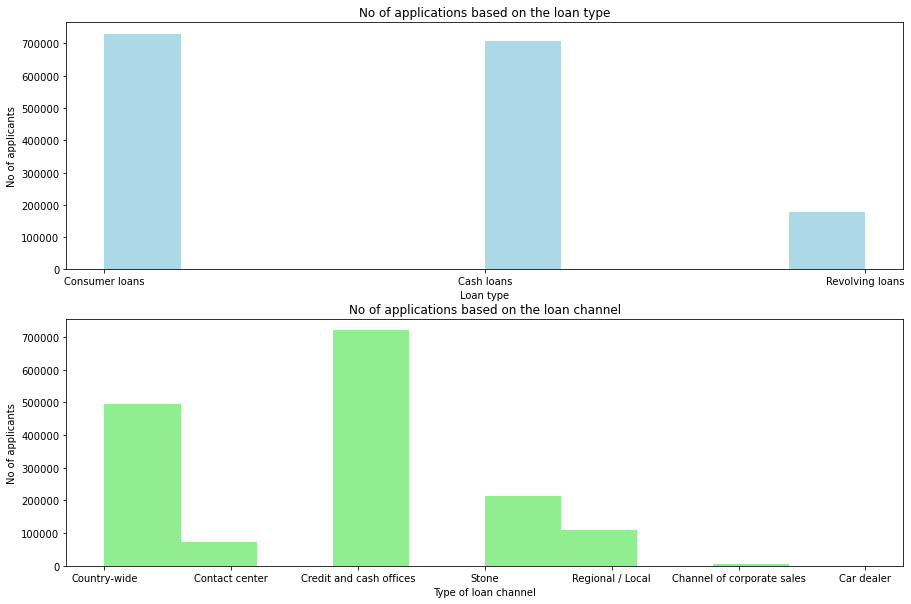

In [16]:
histogram_1 = plt.figure(figsize = (15,10))
#Type of loan
plot1 = histogram_1.add_subplot(2,1,1)
plt.hist(credit_data.NAME_CONTRACT_TYPE, color='lightblue')
plt.title('No of applications based on the loan type')
plt.xlabel('Loan type')
plt.ylabel('No of applicants');
#Type of loan channel
plot2 = histogram_1.add_subplot(2,1,2)
plt.hist(credit_data.CHANNEL_TYPE, color='lightgreen')
plt.title('No of applications based on the loan channel')
plt.xlabel('Type of loan channel')
plt.ylabel('No of applicants');

#### *Insights*
    1. From the first histogram we can infere that most of the people are taking consumer and cash loans than revolving loan
    2. From the second histogram we can infer that peopel prefers to take loan from credit and cash offices

### Histogram of the type of loan sanctioned for the top 100 applications based on the amount

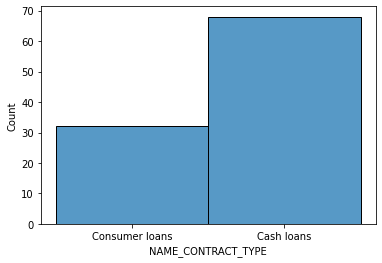

In [17]:
sns.histplot(x="NAME_CONTRACT_TYPE", data=credit_data.nlargest(100,'AMT_APPLICATION'));

####  Insight
    Most of the high value loans are cash loans

### Barplot for the different name contract status with respect to the mean of the application amount

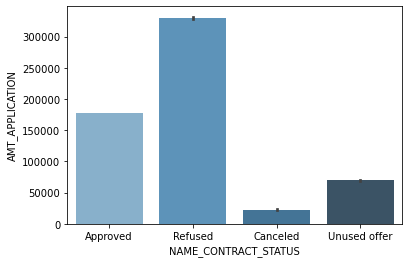

In [18]:
sns.barplot(x="NAME_CONTRACT_STATUS", y="AMT_APPLICATION", data=credit_data, estimator=np.mean, palette="Blues_d");

#### Insight
    The median value of the loan application is greater than the approved loans.
    So the loans with greater amount are high chance for refusal

### KDE Plot to companre the PDF of application processing time based on the product type

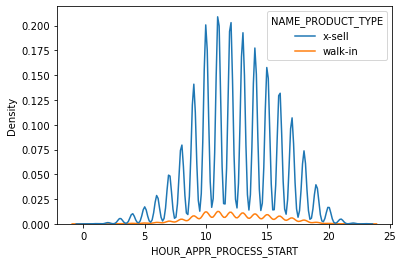

In [19]:
sns.kdeplot(data=credit_data, x="HOUR_APPR_PROCESS_START", hue='NAME_PRODUCT_TYPE');

#### Insight
    The Probability distribution of the hours of applications process start both the product type is similar and the magnitude of the x-sell method is greater than than walk-in method as more number of customers using the x-sell product type

### Computing and visualising pairwise correlation of numerical columns

                           SK_ID_PREV  AMT_ANNUITY  AMT_APPLICATION  \
SK_ID_PREV                   1.000000     0.005300         0.003235   
AMT_ANNUITY                  0.005300     1.000000         0.808118   
AMT_APPLICATION              0.003235     0.808118         1.000000   
AMT_CREDIT                   0.003577     0.812536         0.977596   
AMT_DOWN_PAYMENT            -0.005796     0.060106         0.077646   
AMT_GOODS_PRICE              0.008149     0.818432         0.987768   
HOUR_APPR_PROCESS_START     -0.002648    -0.023846        -0.012998   
NFLAG_LAST_APPL_IN_DAY      -0.002474     0.013414         0.004540   
RATE_DOWN_PAYMENT           -0.008021    -0.102345        -0.062513   
DAYS_DECISION                0.019339     0.192564         0.133219   
SELLERPLACE_AREA            -0.001079    -0.011440        -0.007342   
CNT_PAYMENT                  0.009882     0.406831         0.682072   
DAYS_FIRST_DRAWING           0.006226     0.045636         0.044799   
DAYS_F

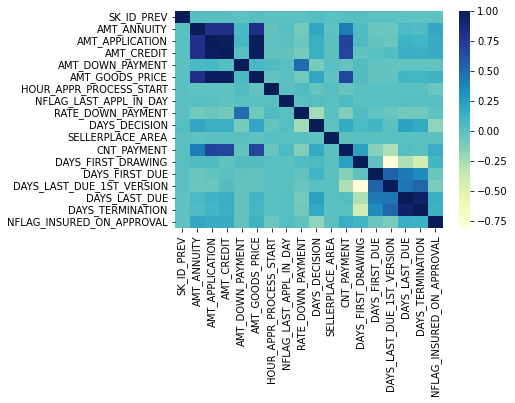

In [20]:
#Finding the numercial coloumns in the dataset
numeric_cols = []
for col in credit_data.columns:
    if credit_data[col].dtype in ['float64','int64']:
        numeric_cols.append(col)

# Finding the pairwise correlation
pair_corrrelation = credit_data[numeric_cols].corr()       
print(pair_corrrelation)

#Colour space of YlGnBu is used in the heatmap
sns.heatmap(pair_corrrelation, cmap="YlGnBu");                         

#### Insights 
    1. From that we can see there is high correlation between the Application amount and count of payments.So the people who are getting big loans are paying the credit many numbers of times. This may be due to the long tenure of the loan perios
    2. Also the annuity amount and application amount has high correlation. 

### Pie chart to know the client type who are taking loans from bank

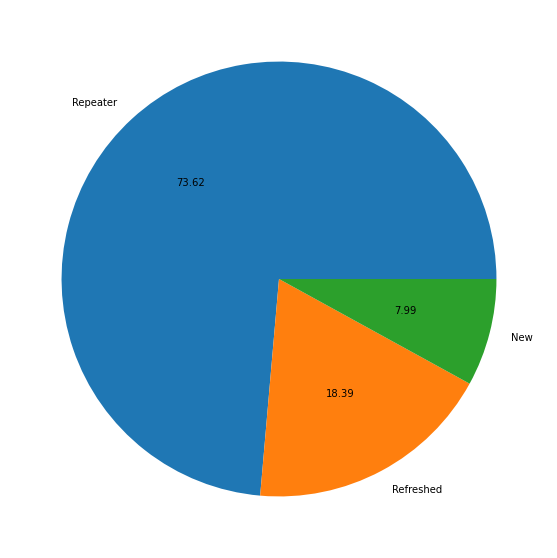

In [21]:
fig=plt.figure(figsize=(10,10))
plt.pie(credit_data['NAME_CLIENT_TYPE'].value_counts(),labels=set(credit_data['NAME_CLIENT_TYPE']),autopct='%.2f');

### Insight
    Around 74% of clients are repeater clients. Whereas 18% are new clients who are taking loan from the bank first time.

### Box plot to understand the outliers in amount of annuity

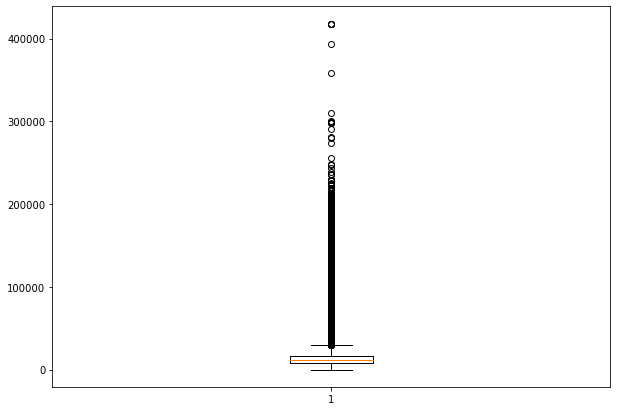

In [22]:
fig2=plt.figure(figsize=(10,7))
plt.boxplot(credit_data['AMT_ANNUITY'])
plt.show();

In [23]:
q3,q1=np.percentile(credit_data['AMT_ANNUITY'],[75,25])
iqr=q3-q1
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
print('Upper limit is:',ul)
print('Lower limit is:',ll)

Upper limit is: 30022.222499999996
Lower limit is: -6051.037499999998


In [24]:
count=0
for val in credit_data['AMT_ANNUITY']:
    if val>ul or val<ll:
        count=count+1
print('The no. of outliers is:',count)
print(round(((count/len(credit_data))*100),2),'% of data are outliers')

The no. of outliers is: 159939
9.91 % of data are outliers


#### Insight
    Around 10% of data are outliers in annuity amount data, all of which have value higher than the upper limit and therefore we get mean higher than the median.

## Conclusion

1. If we are going for big size loans above 17,00,000 there is high chance of rejection
2. The loan ticket size is larger the insurance annuity amount should be larger for acceptance of the loan
3. Sell and walk in loans are treated in the same way in the bank
4. People are prefering to take loan from the credit\sales office
5. Bank has performed excellent in retaining its customer base however it can do well in gaining new customers.
6. Outliers are in significant numbers and therefore they needs to be considered in future decision making.